In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
#scrape table from website
import requests

url = 'https://www.tsa.gov/coronavirus/passenger-throughput'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)

dfs = pd.read_html(r.text)

#create dataframe
df = dfs[0][['Date', '2021', '2020', '2019']]

In [3]:
df_2021 = df[['Date', '2021']]
df_2020 = df[['Date', '2020']]
df_2019 = df[['Date', '2019']]

In [4]:
#convert to datetime
df_2021['Date'] = pd.to_datetime(df_2021['Date'])
df_2020['Date'] = pd.to_datetime(df_2020['Date'])
df_2019['Date'] = pd.to_datetime(df_2019['Date'])

# change all years to 2021
df_2021['Date'] = df_2021['Date'].apply(lambda x: x.replace(year=2021))
df_2020['Date'] = df_2020['Date'].apply(lambda x: x.replace(year=2020))
df_2019['Date'] = df_2019['Date'].apply(lambda x: x.replace(year=2019))

#sort by date
df_2021 = df_2021.sort_values(by='Date')
df_2020 = df_2020.sort_values(by='Date')
df_2019 = df_2019.sort_values(by='Date')

#rename columns
df_2021.columns = ['Date', 'Throughput']
df_2020.columns = ['Date', 'Throughput']
df_2019.columns = ['Date', 'Throughput']

C:\Users\shyam\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\shyam\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shyam\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [10]:
# concat dataframes together
df_2021_2020 = pd.concat([df_2021, df_2020], axis=0)
df_2021_2020_2019 = pd.concat([df_2021_2020, df_2019], axis=0)

#save to csv
df_2021_2020_2019.to_csv('TSA_TP_2019-21.csv')

<AxesSubplot:xlabel='Date'>

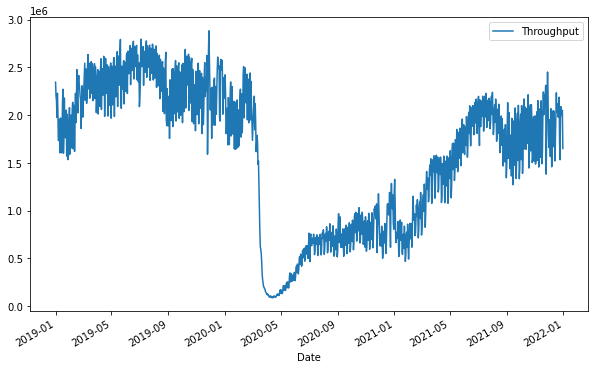

In [12]:
#plot
fig, ax = plt.subplots(figsize=(10,6))
df_2021_2020_2019.plot(x='Date', y='Throughput', ax=ax)

In [13]:
#load population travel data
df_pop = pd.read_excel('population_travel_national.xlsx')

In [16]:
df_pop['Date'] = pd.to_datetime(df_pop['Date'])

#drop Level, Row ID, Week, and Month columns
df_pop = df_pop.drop(columns=['Level', 'Row ID', 'Week', 'Month'])

#merge with throughput data
df_pop_tp = pd.merge(df_pop, df_2021_2020_2019, on='Date')

In [20]:
df_pop_tp.head()

,Date,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Throughput
0,2019-01-01,77433867,248733553,897784368,241667151,234284795,108078903,129670778,116904343,40432062,15686639,7525563,1806022,1728112,2345103
1,2019-01-02,61305201,264862219,1139452281,291276735,285887315,138039296,171637514,167412698,56148976,17739183,7817044,1962301,1531219,2202111
2,2019-01-03,63050480,263116940,1162752684,296375014,290074425,140771581,175775410,172027487,57632422,18366626,8124548,2038099,1567072,2150571
3,2019-01-04,61803652,264363768,1181953829,293159631,295643296,145251819,181324645,176144493,58761592,19315785,8687318,2096065,1569185,1975947
4,2019-01-05,64389745,261777675,1180476620,295459014,304168709,148540651,180941769,165239790,54842134,19363939,8490791,1991159,1438664,2229391


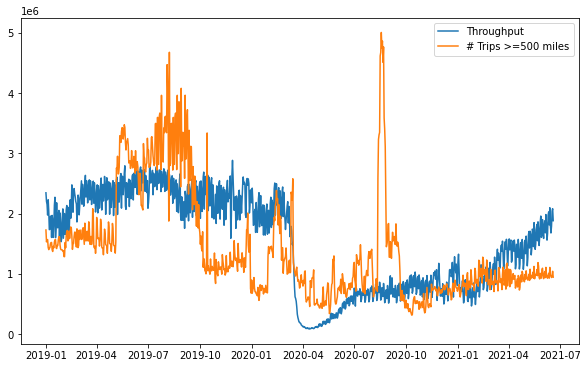

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(df_pop_tp['Date'], df_pop_tp['Throughput'],label='Throughput')
plt.plot(df_pop_tp['Date'], df_pop_tp['Number of Trips >=500'], label='# Trips >=500 miles')
plt.legend()

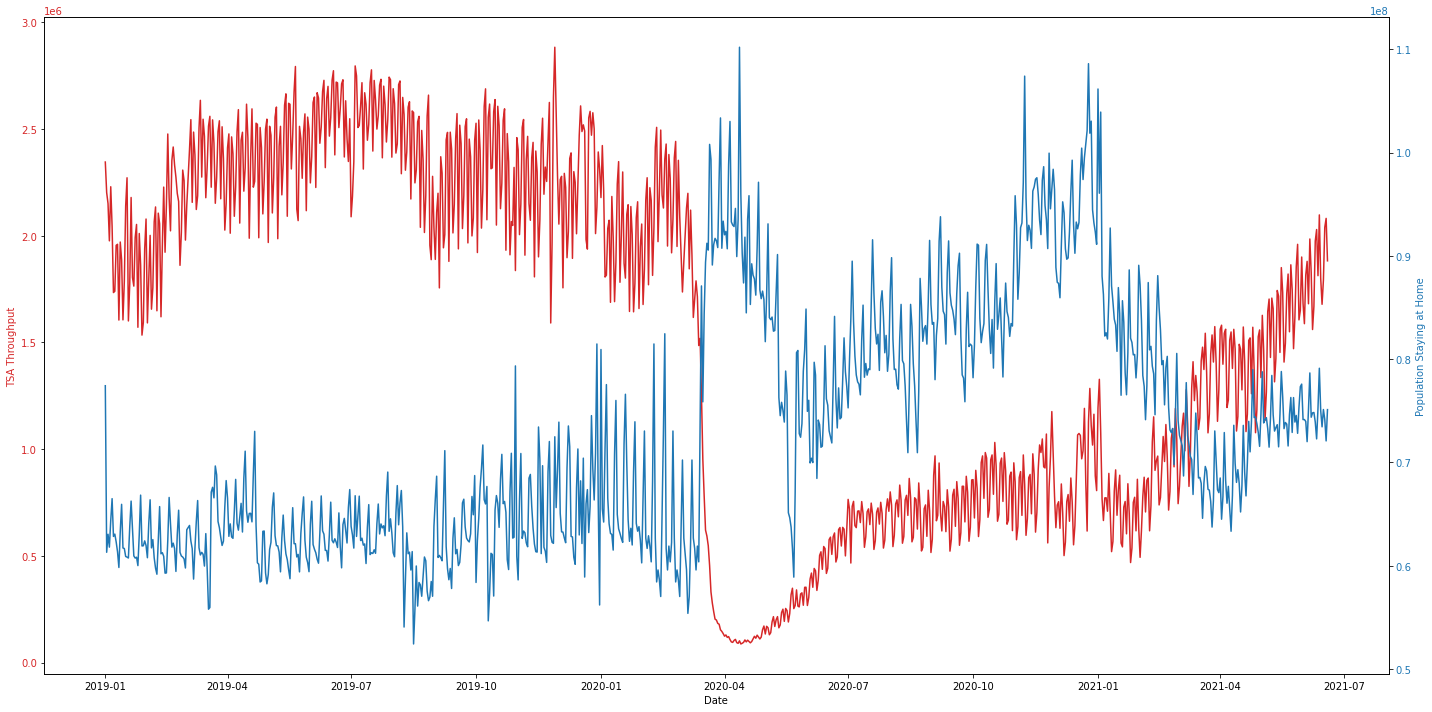

In [28]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('TSA Throughput', color=color)
ax1.plot(df_pop_tp['Date'], df_pop_tp['Throughput'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Population Staying at Home', color=color)  # we already handled the x-label with ax1
ax2.plot(df_pop_tp['Date'], df_pop_tp['Population Staying at Home'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [38]:
df_pop_tp.shape

(897, 15)

In [72]:
# add covid data
df_covid = pd.read_csv('owid-covid-data.csv')

# filter data to USA
df_covid = df_covid[df_covid['location'] == 'United States']

#convert date to datetime
df_covid['date'] = pd.to_datetime(df_covid['date'])

#rename date to Date
df_covid = df_covid.rename(columns={'date': 'Date'})

#drop iso_code, continent, and location columns
df_covid = df_covid.drop(columns=['iso_code', 'continent', 'location'])

#print shape
df_covid.shape

(771, 64)

In [73]:
#drop columns with more than 10% missing data
df_covid = df_covid.dropna(axis=1, thresh=int(df_covid.shape[0]*0.1))

In [74]:
df_covid = df_covid[['Date', 'new_cases_smoothed', 'new_deaths_smoothed',  'new_tests_smoothed']]

In [75]:
df_covid.isna().sum()

Date                    0
new_cases_smoothed      7
new_deaths_smoothed    44
new_tests_smoothed     54
dtype: int64

In [76]:
# fill missing data based on previous day
df_covid['new_cases_smoothed'] = df_covid['new_cases_smoothed'].fillna(method='ffill')
df_covid['new_deaths_smoothed'] = df_covid['new_deaths_smoothed'].fillna(method='ffill')
df_covid['new_tests_smoothed'] = df_covid['new_tests_smoothed'].fillna(method='ffill')

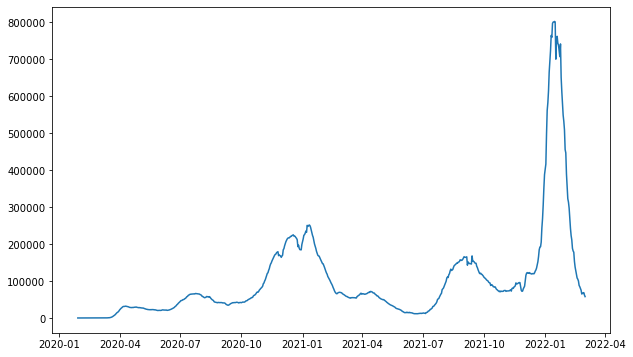

In [79]:
fig, ax = plt.subplots(figsize=(10,6))

plt.plot(df_covid['Date'], df_covid['new_cases_smoothed'], label='New Cases')

In [80]:
#merge with throughput data
df_covid_tp = pd.merge(df_covid, df_pop_tp, on='Date')

In [84]:
#save to csv
df_covid_tp.to_csv('TSA_TP_2019-21_Covid.csv')

In [86]:
df_covid_tp.columns

Index(['Date', 'new_cases_smoothed', 'new_deaths_smoothed',
       'new_tests_smoothed', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips',
       'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5',
       'Number of Trips 5-10', 'Number of Trips 10-25',
       'Number of Trips 25-50', 'Number of Trips 50-100',
       'Number of Trips 100-250', 'Number of Trips 250-500',
       'Number of Trips >=500', 'Throughput'],
      dtype='object')

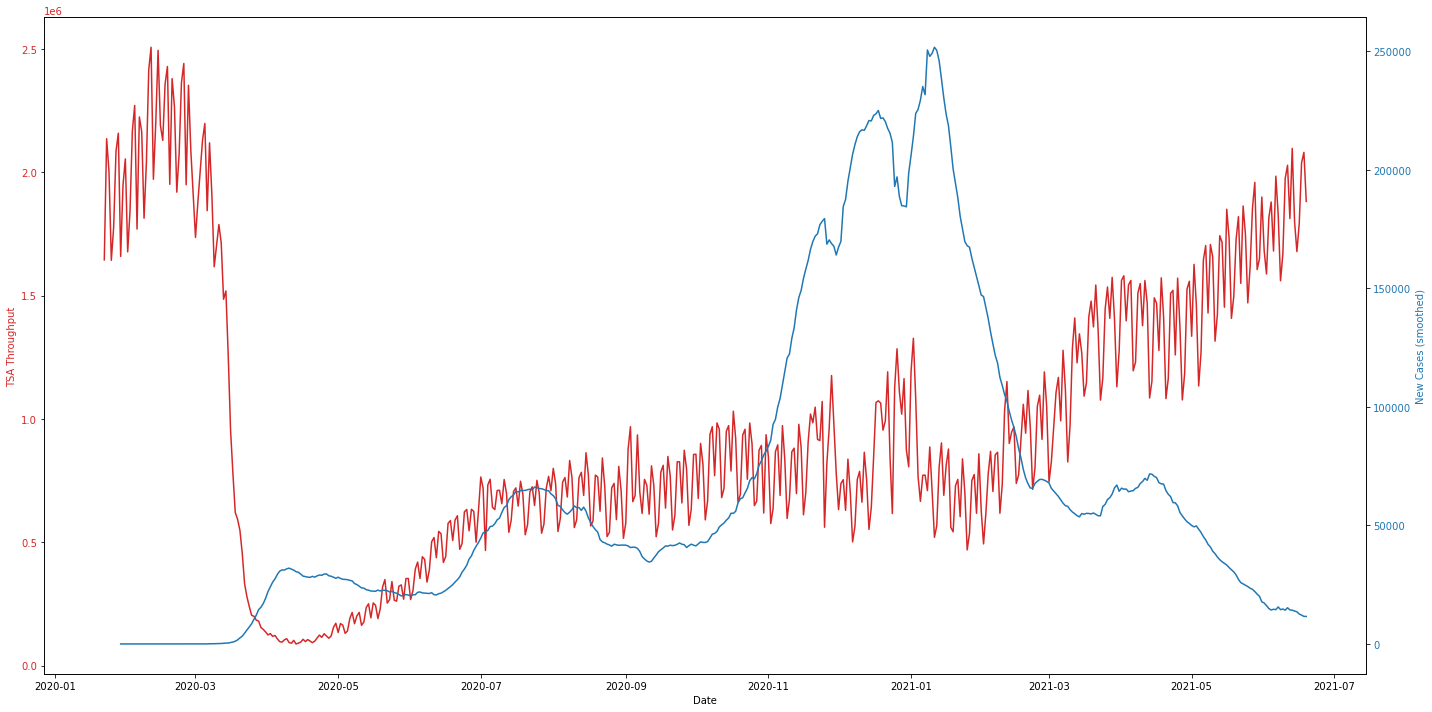

In [93]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('TSA Throughput', color=color)
ax1.plot(df_covid_tp['Date'], df_covid_tp['Throughput'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('New Cases (smoothed)', color=color)  # we already handled the x-label with ax1
ax2.plot(df_covid_tp['Date'], df_covid_tp['new_cases_smoothed'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

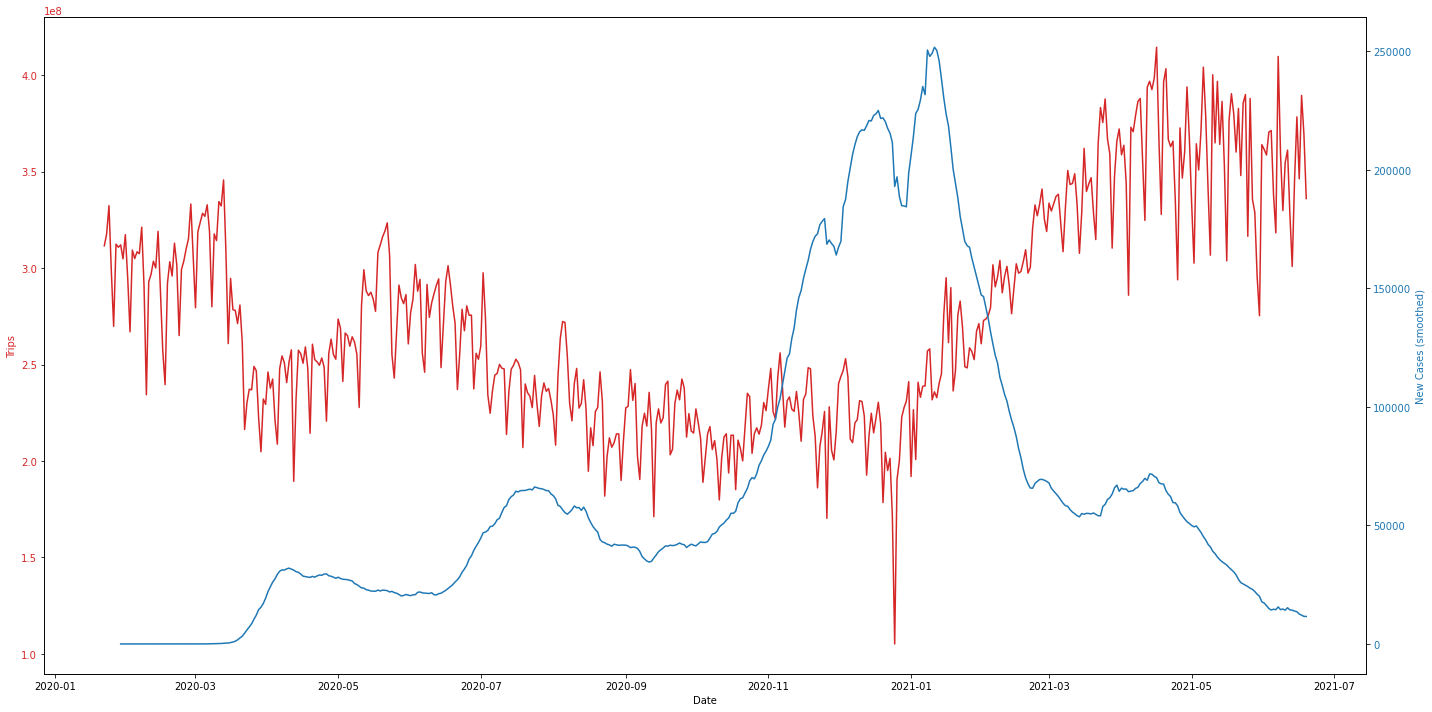

In [96]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Trips', color=color)
ax1.plot(df_covid_tp['Date'], df_covid_tp['Number of Trips <1'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('New Cases (smoothed)', color=color)  # we already handled the x-label with ax1
ax2.plot(df_covid_tp['Date'], df_covid_tp['new_cases_smoothed'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

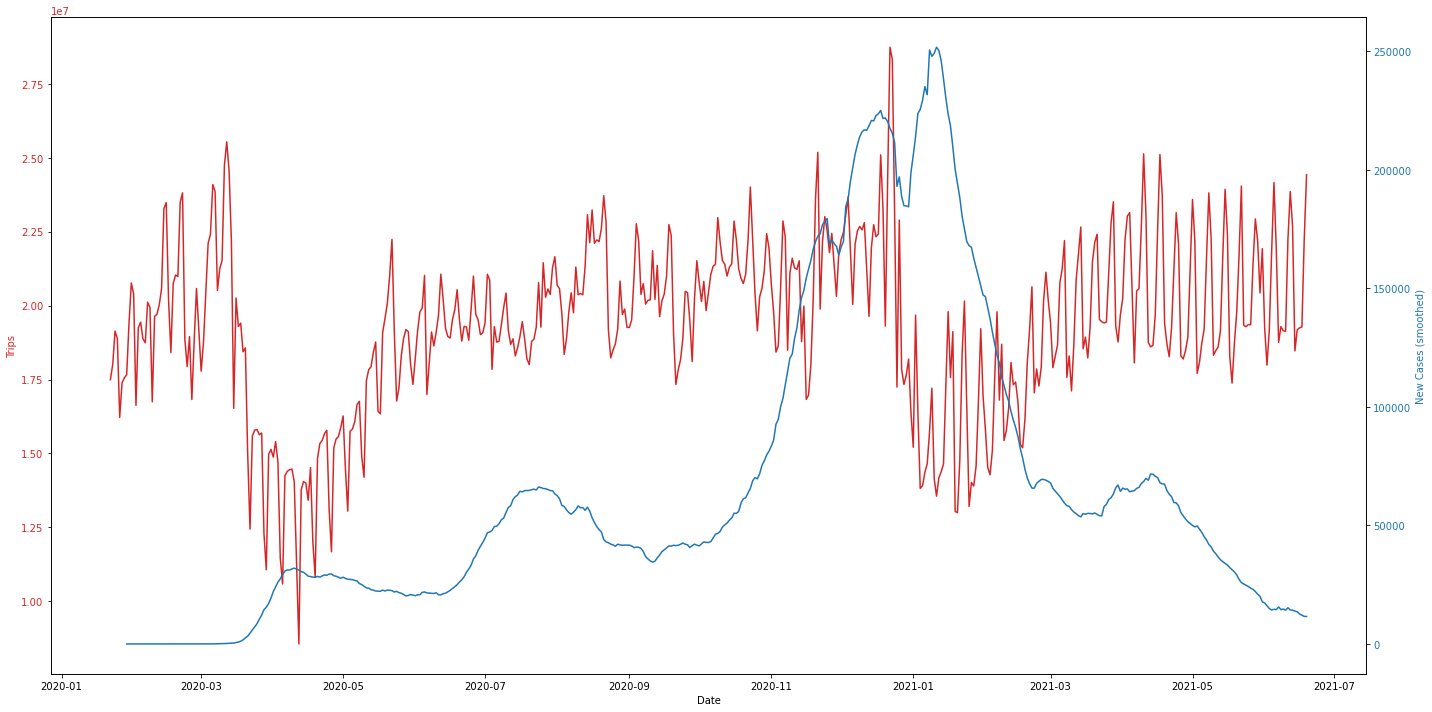

In [98]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Trips', color=color)
ax1.plot(df_covid_tp['Date'], df_covid_tp['Number of Trips 50-100'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('New Cases (smoothed)', color=color)  # we already handled the x-label with ax1
ax2.plot(df_covid_tp['Date'], df_covid_tp['new_cases_smoothed'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

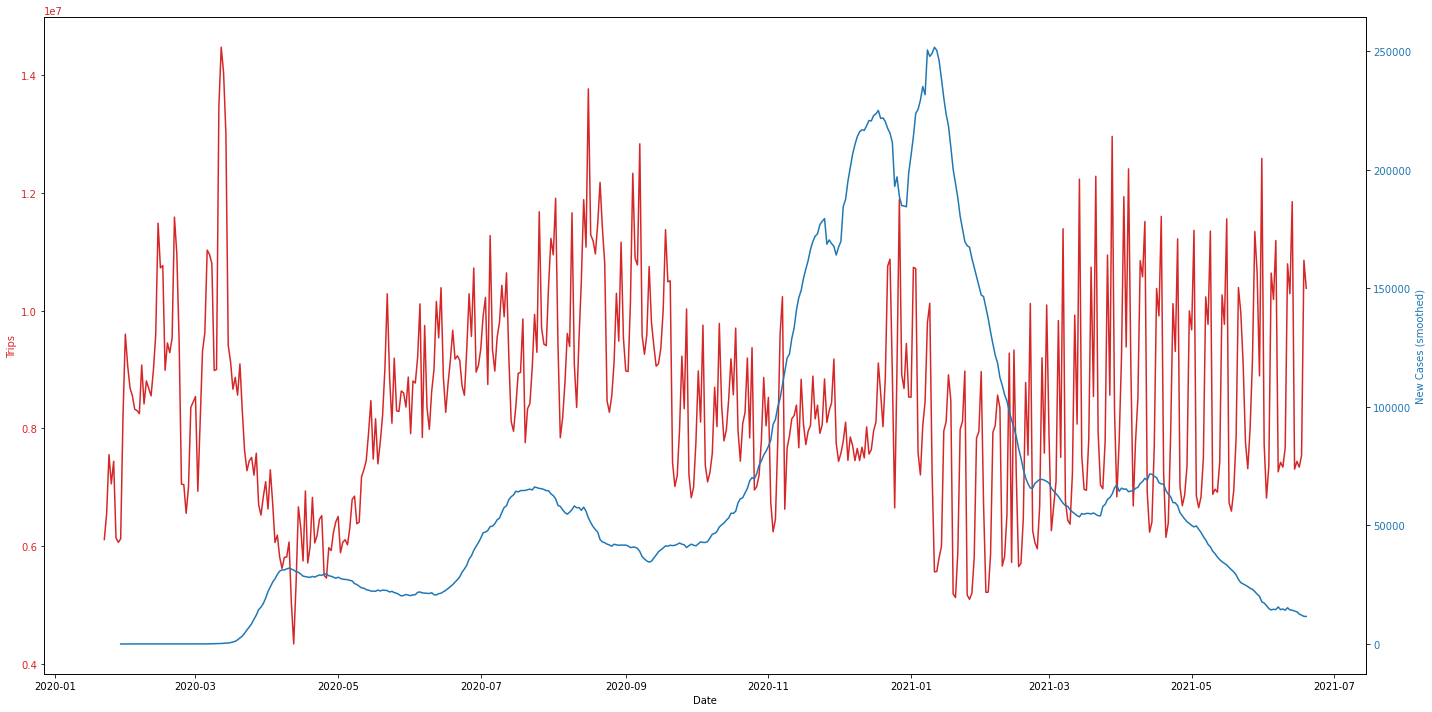

In [99]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Trips', color=color)
ax1.plot(df_covid_tp['Date'], df_covid_tp['Number of Trips 100-250'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('New Cases (smoothed)', color=color)  # we already handled the x-label with ax1
ax2.plot(df_covid_tp['Date'], df_covid_tp['new_cases_smoothed'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

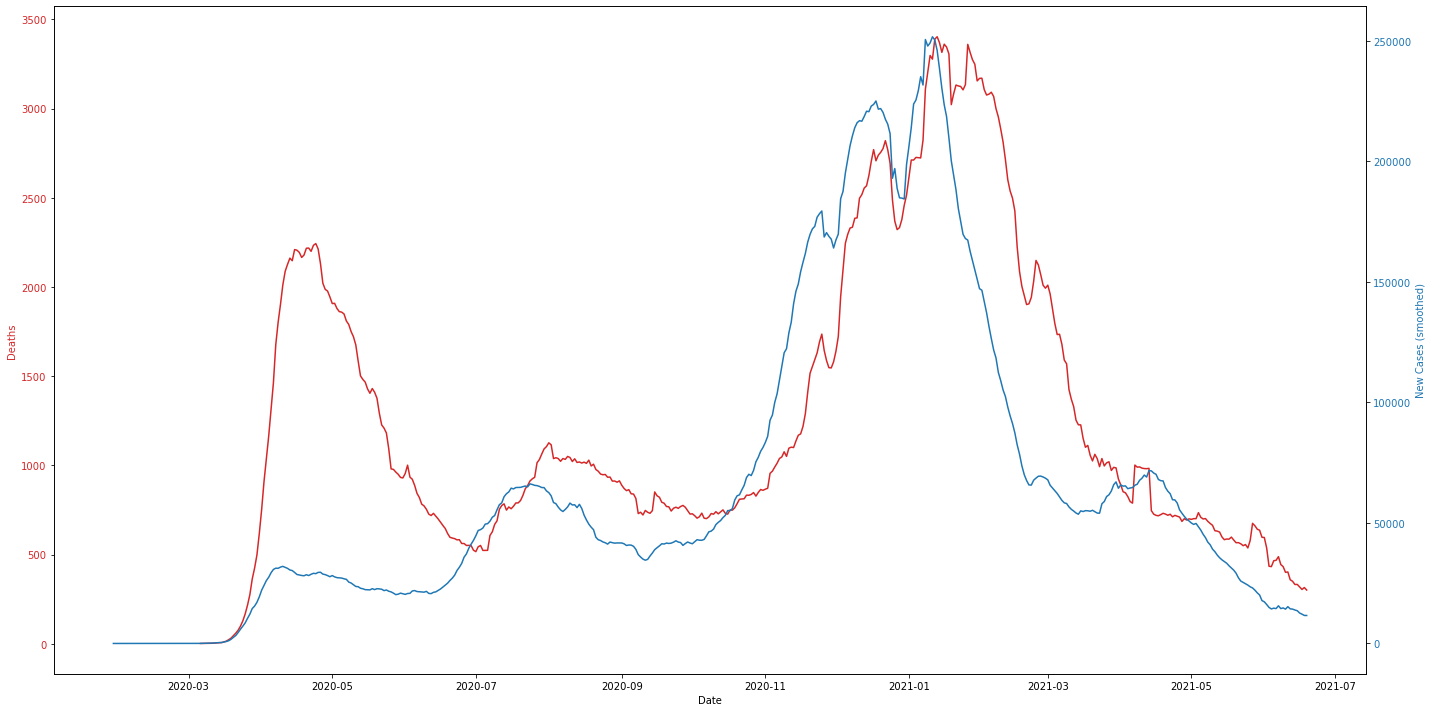

In [100]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Deaths', color=color)
ax1.plot(df_covid_tp['Date'], df_covid_tp['new_deaths_smoothed'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('New Cases (smoothed)', color=color)  # we already handled the x-label with ax1
ax2.plot(df_covid_tp['Date'], df_covid_tp['new_cases_smoothed'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [101]:
#calculate correlation between all variables
df_covid_tp.corr()

,new_cases_smoothed,new_deaths_smoothed,new_tests_smoothed,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Throughput
new_cases_smoothed,1.000000,0.753759,0.839985,0.495296,-0.493991,-0.284744,-0.336714,-0.284822,-0.229812,-0.226318,-0.227795,-0.198795,0.003273,-0.151395,-0.173796,-0.201232,-0.169769
new_deaths_smoothed,0.753759,1.000000,0.520347,0.341632,-0.347852,-0.238760,-0.227644,-0.213038,-0.187673,-0.203858,-0.230122,-0.326763,-0.358182,-0.389068,-0.297444,-0.155070,-0.288707
new_tests_smoothed,0.839985,0.520347,1.000000,0.148004,-0.140050,0.067401,-0.063598,0.040662,0.140793,0.160629,0.160012,0.194485,0.290639,-0.029164,-0.153547,-0.103688,0.324360
Population Staying at Home,0.495296,0.341632,0.148004,1.000000,-0.999298,-0.783790,-0.743194,-0.749171,-0.751380,-0.761249,-0.777532,-0.718377,-0.265380,-0.186839,-0.132908,-0.217636,-0.579892
Population Not Staying at Home,-0.493991,-0.347852,-0.140050,-0.999298,1.000000,0.800262,0.761331,0.763769,0.768303,0.778493,0.790963,0.725485,0.269804,0.187272,0.124685,0.212476,0.590444
Number of Trips,-0.284744,-0.238760,0.067401,-0.783790,0.800262,1.000000,0.962628,0.977400,0.989728,0.989439,0.953819,0.790849,0.259254,0.035108,-0.102797,0.023030,0.655487
Number of Trips <1,-0.336714,-0.227644,-0.063598,-0.743194,0.761331,0.962628,1.000000,0.937301,0.936875,0.926400,0.862497,0.643548,0.100440,-0.020089,-0.154745,-0.027820,0.542844
Number of Trips 1-3,-0.284822,-0.213038,0.040662,-0.749171,0.763769,0.977400,0.937301,1.000000,0.982031,0.958583,0.899278,0.716569,0.196763,-0.017776,-0.142545,-0.022963,0.650878
Number of Trips 3-5,-0.229812,-0.187673,0.140793,-0.751380,0.768303,0.989728,0.936875,0.982031,1.000000,0.991863,0.936356,0.756415,0.251116,0.020294,-0.129332,0.013904,0.687128
Number of Trips 5-10,-0.226318,-0.203858,0.160629,-0.761249,0.778493,0.989439,0.926400,0.958583,0.991863,1.000000,0.968146,0.810387,0.286839,0.032533,-0.111593,0.038269,0.688775
